[TOC]

# air_reseデータテーブル確認
### 目的
air_reseのテーブルをチェックする  
アブストラクトは下記に書き留める  
### 
air_reseは4つのカラムが存在している  



|カラム名|air_store_id|visit_datetime|reserve_datetime|reserve_visitors|
| ----  | ----       | ----         | ----           |----            |
|意味|airレジを使用している店のID|客の訪問日時|予約日時|予約客人数|
|データ型|ID         |datetime           |datetime           |int             |
|最小|-             |2016-01-01 19:00:00|2016-01-01 01:00:00|      0          |
|最大| -            |2017-05-31 21:00:00|2017-04-22 23:00:00|       100         |
|異常値|無し|無し|無し|無し|


||reserve_visitors|
| ----  | ----       |
|count	|92378.000000|
|mean	|4.481749|
|std	|4.919669|
|min	|1.000000|
|25%	|2.000000|
|50%	|3.000000|
|75%	|5.000000|
|max	|100.000000|

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

comma_formatter = mpl.ticker.FuncFormatter(lambda x, _: u'{:,.0f}'.format(x))

In [19]:
sns.set(font=['IPAMincho'])
sns.set_style("dark")

In [20]:
air_rese_df = pd.read_csv('../data/air_reserve.csv')

In [21]:
air_rese_df.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [22]:
air_rese_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [23]:
air_rese_df['visit_datetime'] = pd.to_datetime(
    air_rese_df['visit_datetime'])
air_rese_df['reserve_datetime'] = pd.to_datetime(
    air_rese_df['reserve_datetime'])

In [24]:
air_rese_df.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [25]:
air_rese_df.describe(include='all')

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
count,92378,92378,92378,92378.000000
unique,314,4975,7513,NaN
top,air_8093d0b565e9dbdf,2016-12-24 19:00:00,2016-11-24 18:00:00,NaN
freq,2263,255,106,NaN
first,NaN,2016-01-01 19:00:00,2016-01-01 01:00:00,NaN
last,NaN,2017-05-31 21:00:00,2017-04-22 23:00:00,NaN
mean,NaN,NaN,NaN,4.481749
std,NaN,NaN,NaN,4.919669
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2.000000


In [26]:
air_rese_df.isnull().all()

air_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

In [27]:
air_rese_df.isna().any()

air_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

## 予約客数の分布を確認する

In [29]:

def max_min(df):
    return (df.max(), df.min())

In [30]:

max_min(air_rese_df['reserve_visitors'])

(100, 1)

予約客数のヒストグラム  
横軸、人数  
縦軸、

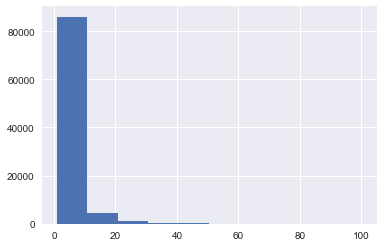

In [31]:
air_rese_df['reserve_visitors'].hist()

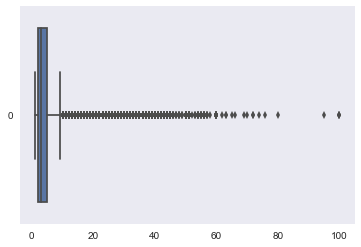

In [45]:
sns.boxplot(data=air_rese_df['reserve_visitors'],
            orient='h')

## 月における予約客数推移を見る

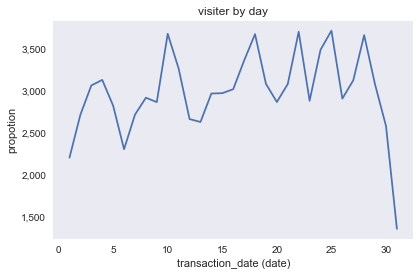

In [52]:
agg = air_rese_df.groupby(air_rese_df.visit_datetime.dt.day).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_date (date)')
ax.set_ylabel('propotion')
ax.set_title('visiter by day')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

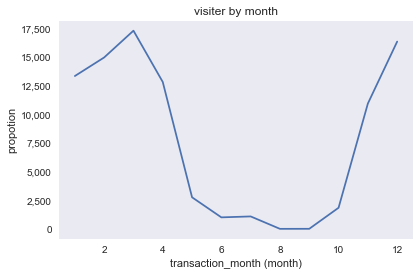

In [80]:
agg = air_rese_df.groupby(air_rese_df.visit_datetime.dt.month).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_month (month)')
ax.set_ylabel('propotion')
ax.set_title('visiter by month')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

## エアレジID毎のトランザクションの割合

In [74]:
air_store_id_dist = air_rese_df.sort_values('air_store_id')\
    .air_store_id.value_counts(normalize=1)
air_store_id_dist.head(10) # 一部

air_8093d0b565e9dbdf    0.024497
air_e55abd740f93ecc4    0.020600
air_0a74a5408a0b8642    0.019821
air_cf5ab75a0afb8af9    0.019031
air_6d65542aa43b598b    0.015545
air_de692863bb2dd758    0.014668
air_326ca454ef3558bc    0.013878
air_03963426c9312048    0.013715
air_483eba479dc9910d    0.013337
air_f911308e19d64236    0.012958
Name: air_store_id, dtype: float64

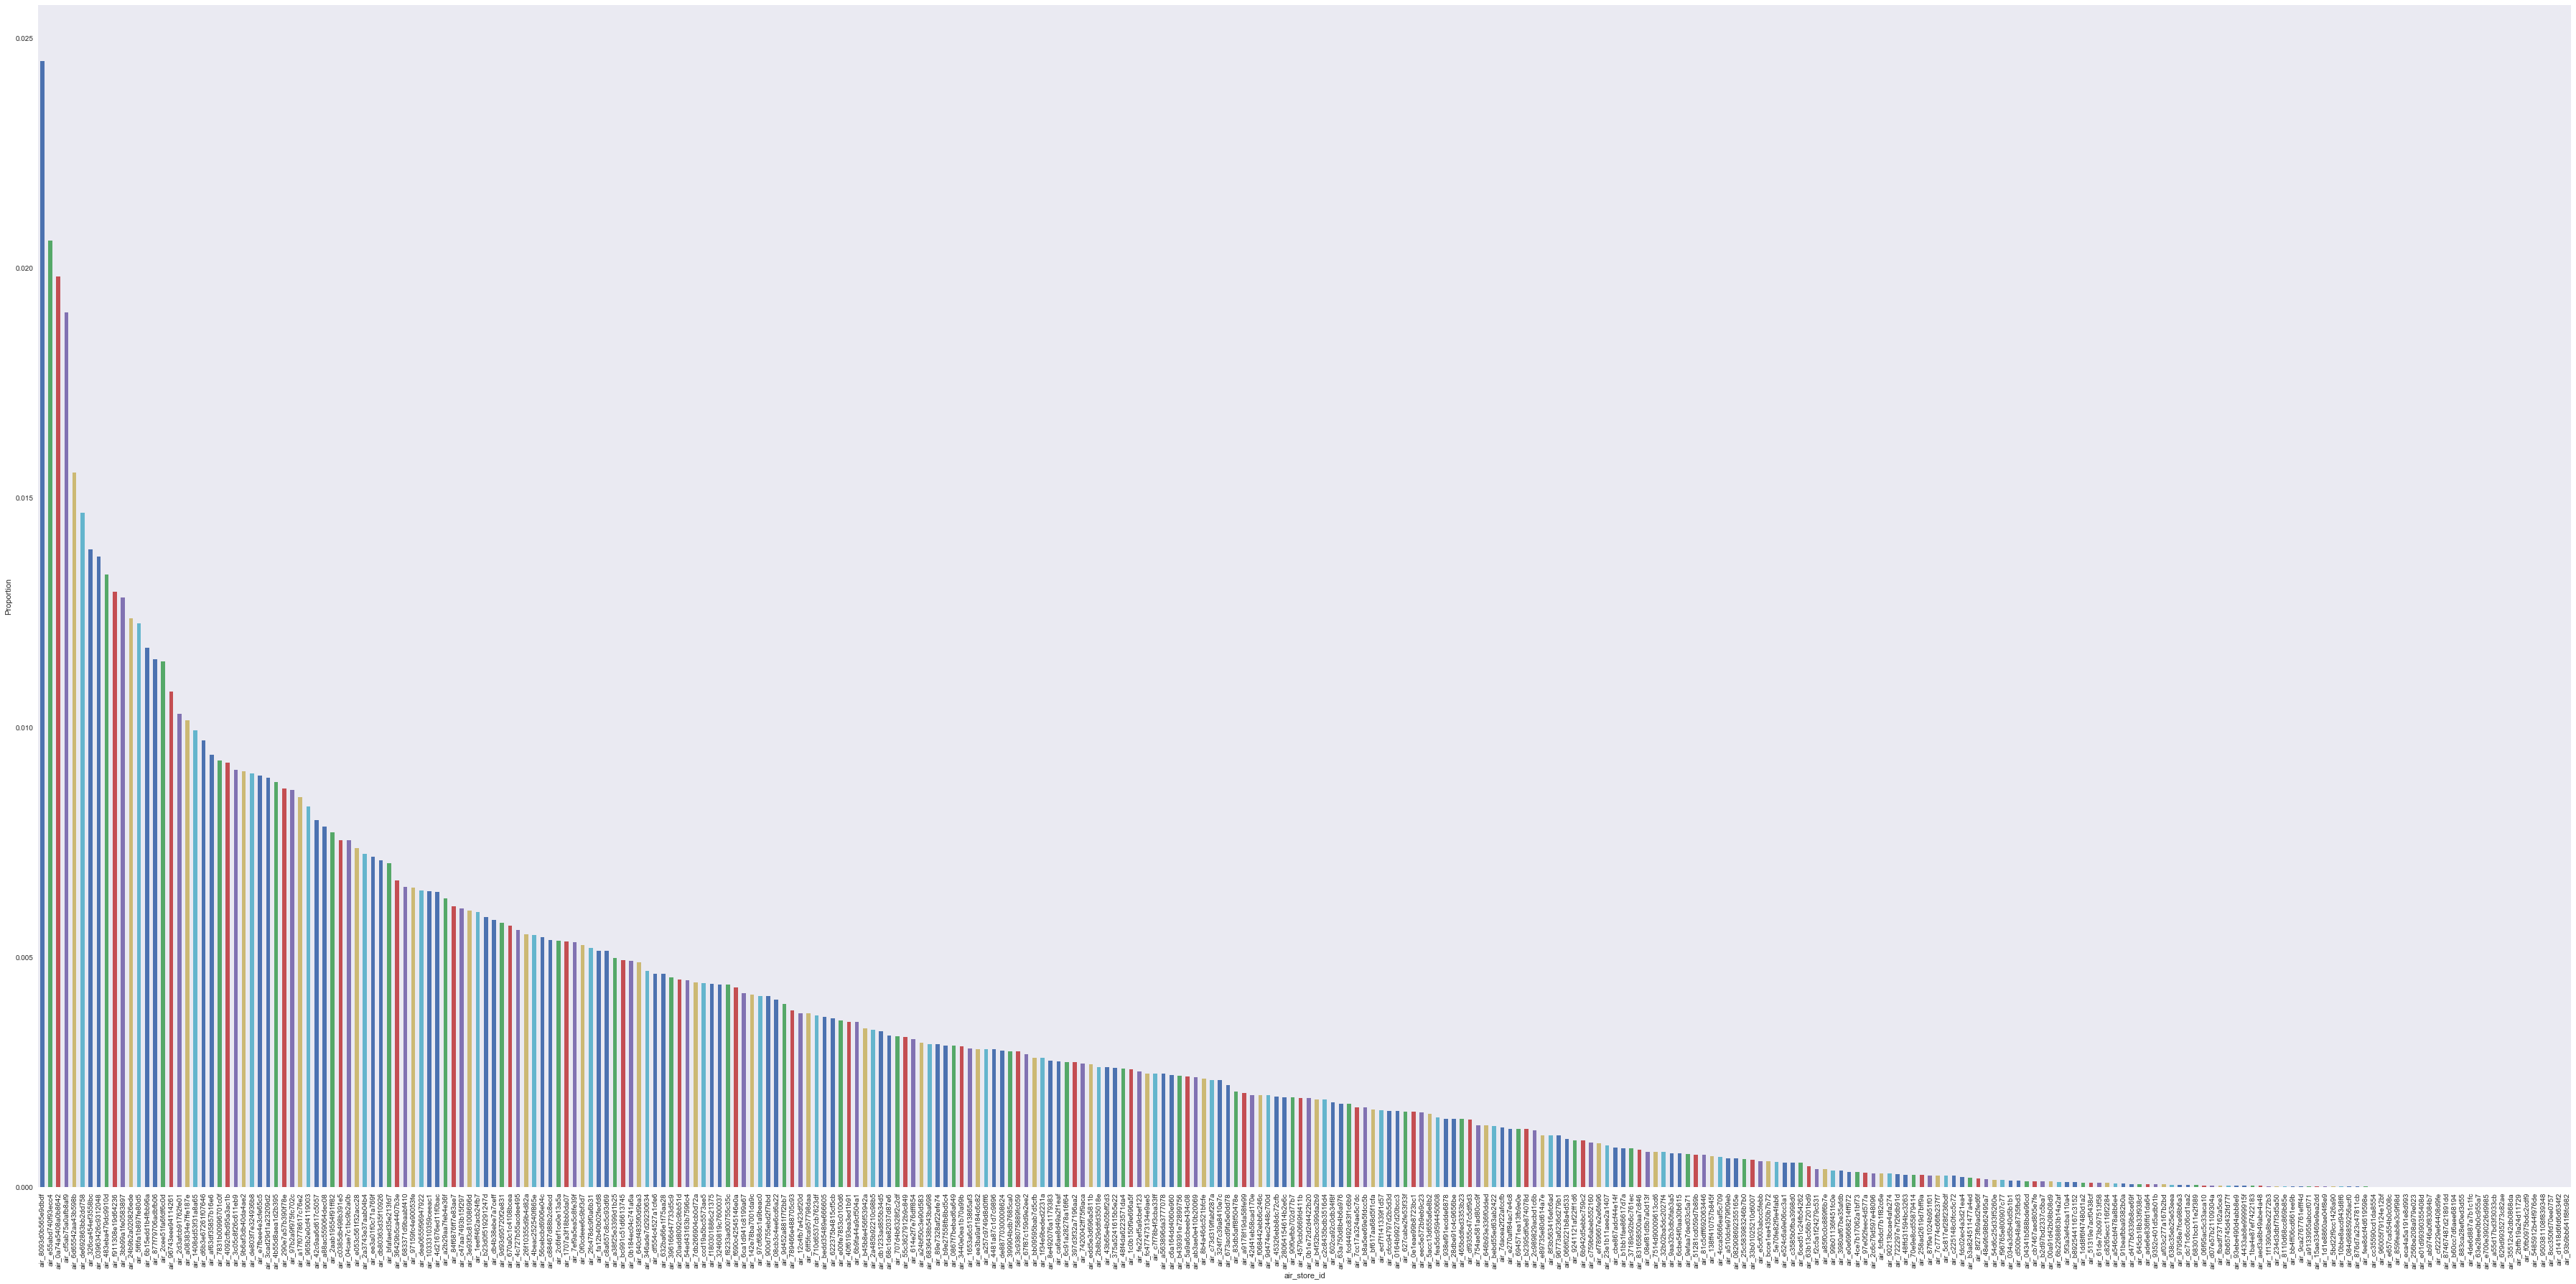

In [75]:
air_store_id_dist.plot.bar(figsize=(50, 25))
plt.xlabel('air_store_id')
plt.ylabel('Proportion')
plt.tight_layout()
#plt.savefig(os.path.join(fig_dir, 'batplot_payment_method_id.png'), dpi=200)
# - `payment_method_id=41` が半数
# - （コードの具体的意味は不明）

## エアレジID毎の顧客数

In [76]:
reserve_visitors_by_store = air_rese_df.sort_values('air_store_id')\
    .groupby('air_store_id')['reserve_visitors'].sum()
reserve_visitors_by_store.head(10) # 一部

air_store_id
air_00a91d42b08b08d9      70
air_0164b9927d20bcc3     517
air_034a3d5b40d5b1b1      93
air_03963426c9312048    8200
air_04341b588bde96cd     208
air_04cae7c1bc9b2a0b    2515
air_066f0221b8a4d533     516
air_06f95ac5c33aca10      31
air_082908692355165e     276
air_084d98859256acf0       8
Name: reserve_visitors, dtype: int64

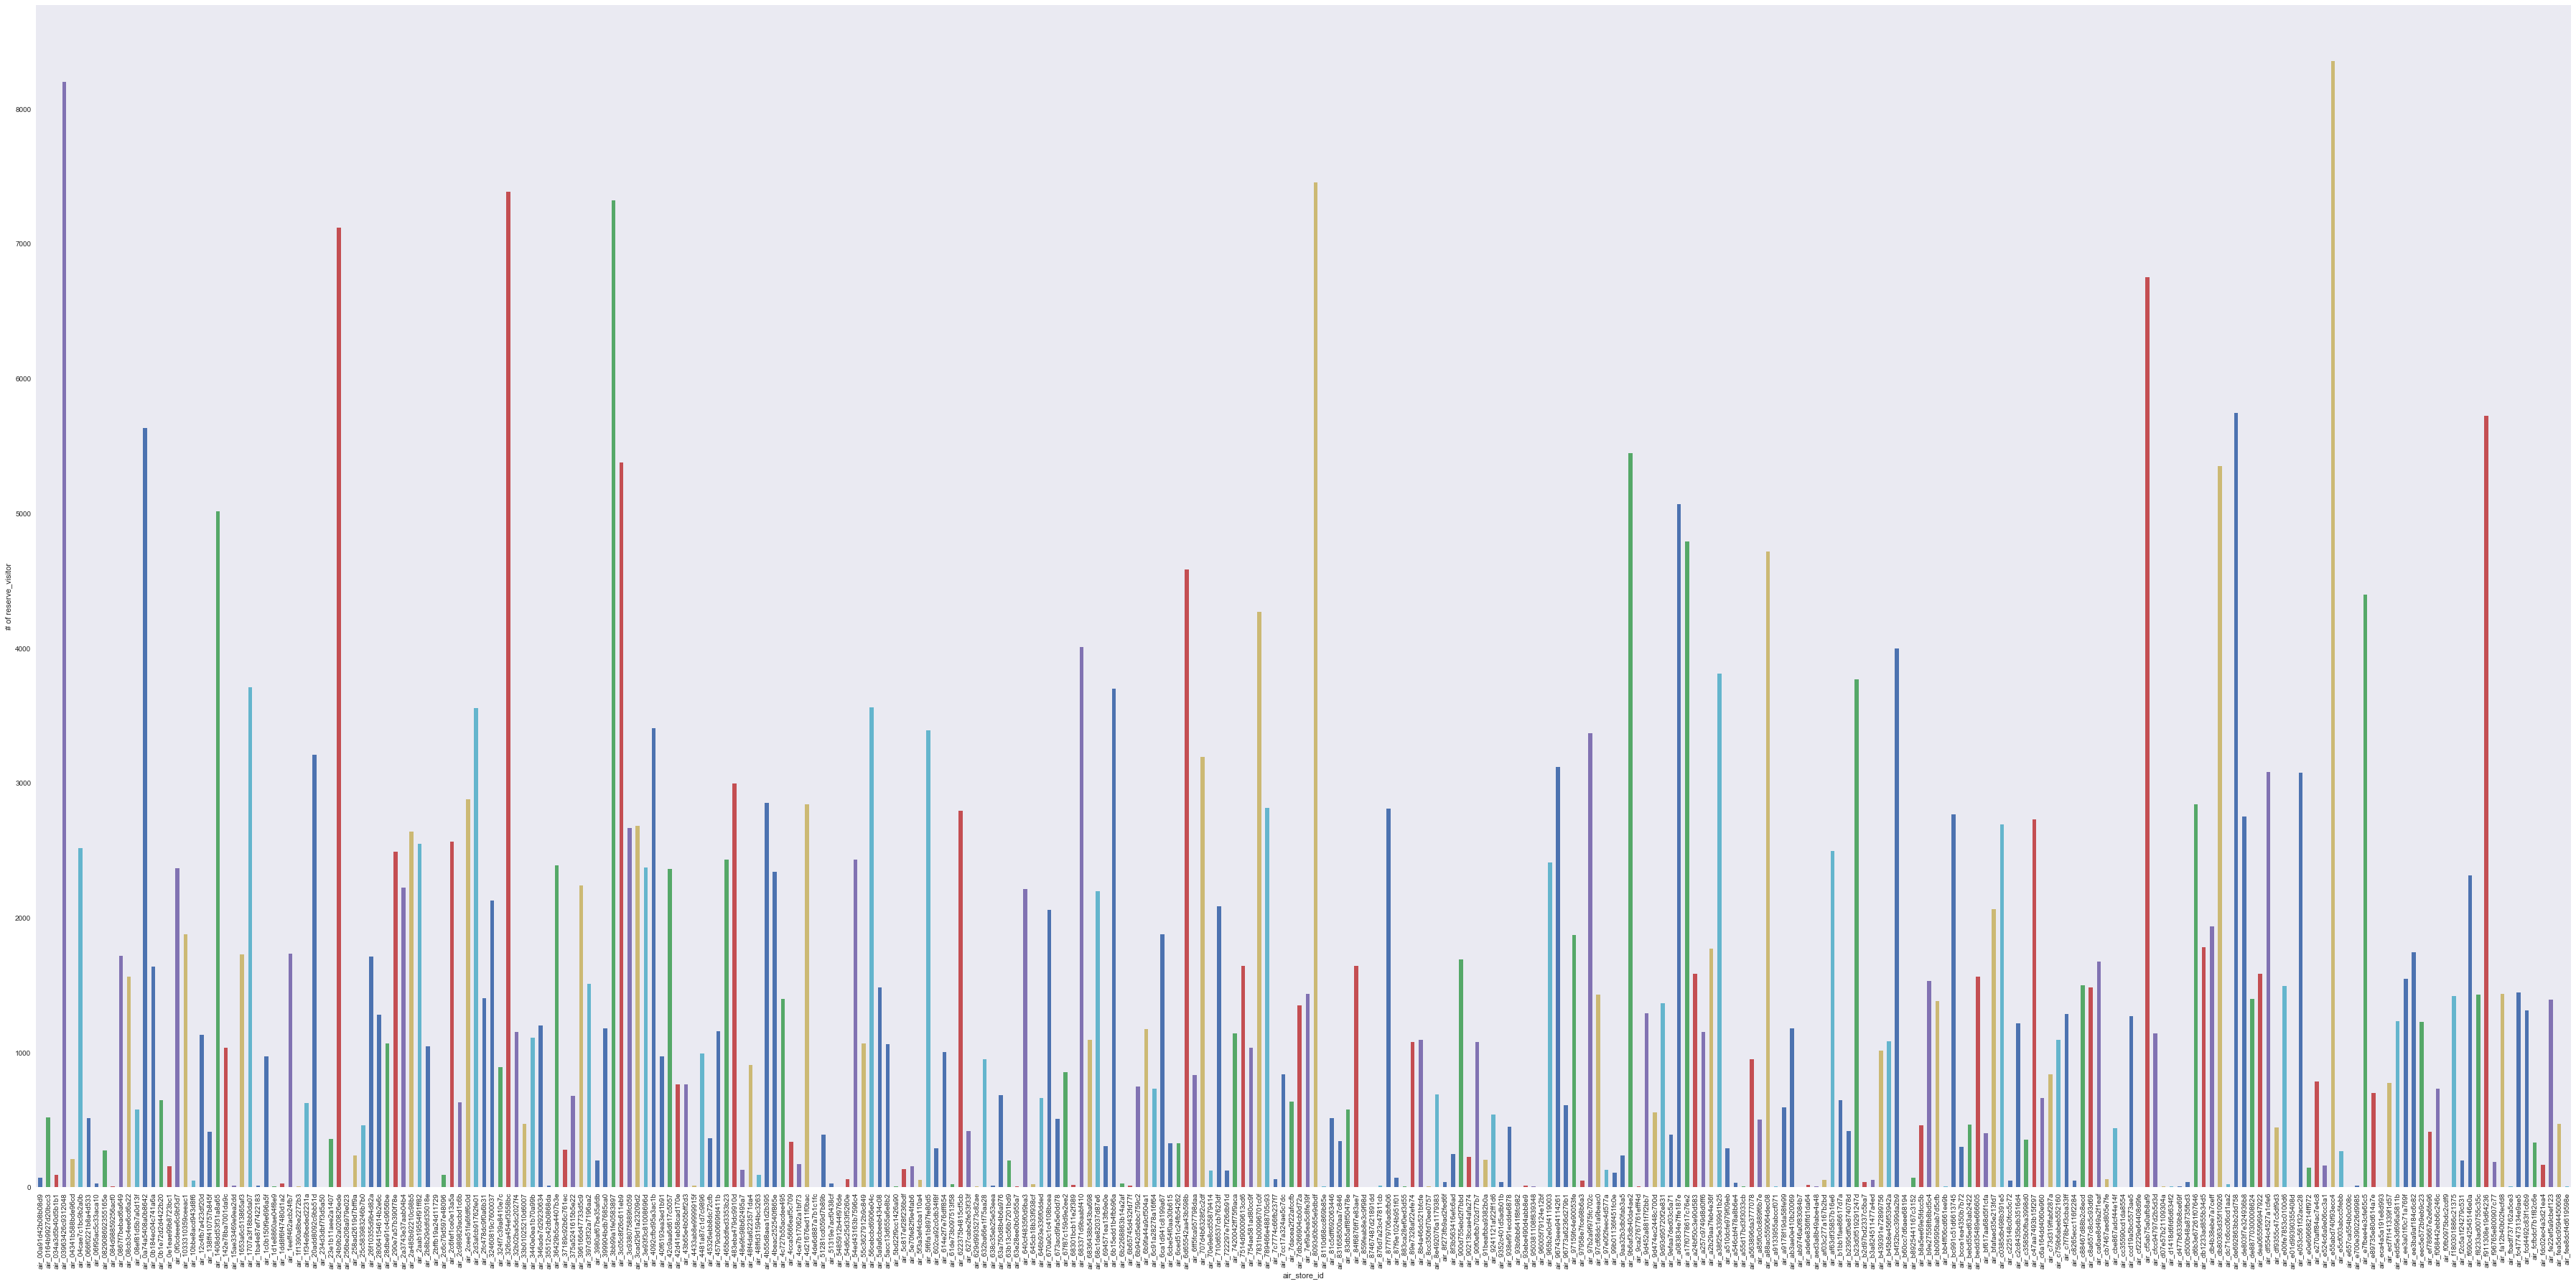

In [77]:
reserve_visitors_by_store.plot.bar(figsize=(50, 25))
plt.xlabel('air_store_id')
plt.ylabel('# of reserve_visitor')
plt.tight_layout()
#plt.savefig(os.path.join(fig_dir, 'batplot_payment_method_id.png'), dpi=200)
# - `payment_method_id=41` が半数
# - （コードの具体的意味は不明）